In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
my_data= pd.read_csv("cars.csv")
my_data.dropna(inplace=True)
my_data

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [3]:
my_data = my_data.drop(['Car_ID' ,"Model"], axis=1)

In [4]:
my_data

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [5]:
my_data["Brand"].value_counts()

Brand
Ford          11
Tata          11
Hyundai       11
BMW           10
Toyota        10
Audi          10
Volkswagen    10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

In [6]:
print(my_data["Brand"].unique())
print(my_data["Fuel_Type"].unique())
print(my_data["Owner_Type"].unique())
print(my_data["Transmission"].unique())

['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
['Petrol' 'Diesel']
['First' 'Second' 'Third']
['Manual' 'Automatic']


In [7]:
# Brand = ['Toyota' ,'Honda', 'Ford' ,'Maruti', 'Hyundai', 'Tata' ,'Mahindra', 'Volkswagen' ,'Audi', 'BMW', 'Mercedes']

# pd.set_option('future.no_silent_downcasting', True)
# my_data["Brand"] = my_data["Brand"].replace( Brand, [0,1,2,3,4,5,6,7,8,9,10] )



In [8]:
# Fuel = ['Petrol' ,'Diesel']

# pd.set_option('future.no_silent_downcasting', True)
# my_data["Fuel_Type"] = my_data["Fuel_Type"].replace(Fuel, [0,1] )

In [9]:
# Owner =['First', 'Second', 'Third']

# pd.set_option('future.no_silent_downcasting', True)
# my_data["Owner_Type"] = my_data["Owner_Type"].replace(Owner, [0,1,2] )

In [10]:
# Trans = ['Manual' ,'Automatic']

# pd.set_option('future.no_silent_downcasting', True)
# my_data["Transmission"] = my_data["Transmission"].replace(Trans, [0,1] )

In [11]:
from sklearn.preprocessing import LabelEncoder
Lbl=LabelEncoder()



Lbl_brand = LabelEncoder()
Lbl_fuel = LabelEncoder()
Lbl_transmission = LabelEncoder()
Lbl_owner = LabelEncoder()


my_data['Brand'] = Lbl_brand.fit_transform(my_data['Brand'])
my_data["Fuel_Type"] = Lbl_fuel.fit_transform(my_data["Fuel_Type"])
my_data['Transmission'] = Lbl_transmission.fit_transform(my_data['Transmission'])
my_data["Owner_Type"] = Lbl_owner.fit_transform(my_data["Owner_Type"])

In [12]:
my_data

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2018,50000,1,1,0,15,1498,108,5,800000
1,3,2019,40000,1,0,1,17,1597,140,5,1000000
2,2,2017,20000,1,0,0,10,4951,395,4,2500000
3,6,2020,30000,0,1,2,23,1248,74,5,600000
4,4,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...
95,7,2019,22000,0,0,0,16,1950,191,5,2900000
96,9,2017,38000,0,1,1,13,2755,171,7,1400000
97,2,2018,26000,1,1,2,18,1497,121,5,750000
98,4,2019,24000,1,0,1,17,1497,113,5,850000


In [13]:
print(my_data["Brand"].unique())

[ 9  3  2  6  4  8  5 10  0  1  7]


In [14]:
print(Lbl_brand.inverse_transform([1,2,3,4,5,6,7,8,9,10]))

['BMW' 'Ford' 'Honda' 'Hyundai' 'Mahindra' 'Maruti' 'Mercedes' 'Tata'
 'Toyota' 'Volkswagen']


<Axes: >

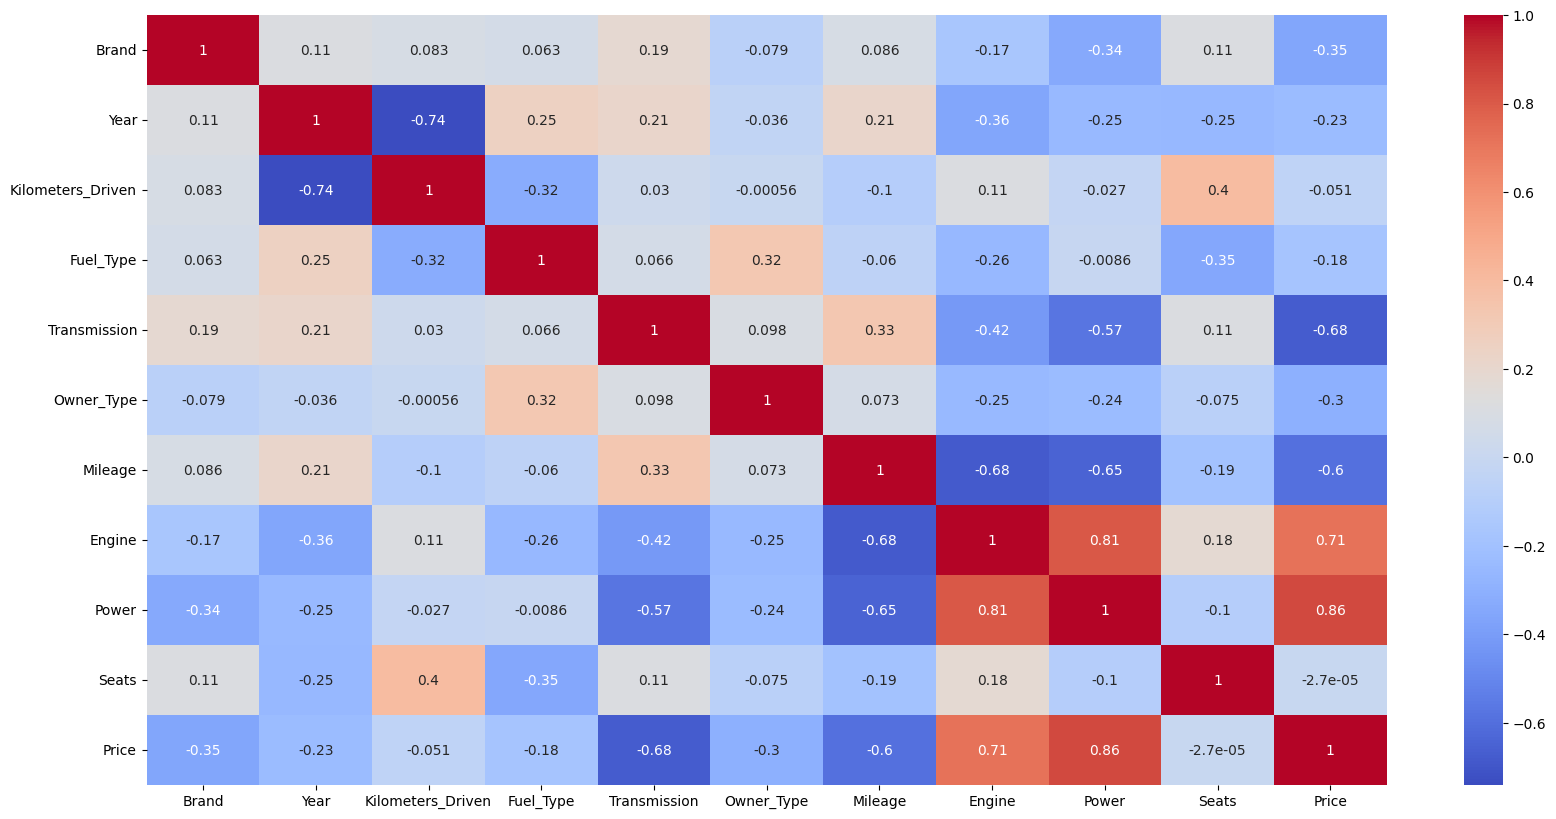

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(my_data.corr(),annot=True,cmap="coolwarm")

In [16]:
X=my_data.drop(["Price"],axis=1)


In [17]:
y=my_data["Price"]
y=pd.DataFrame(y)
y


,Price
0,800000
1,1000000
2,2500000
3,600000
4,850000
...,...
95,2900000
96,1400000
97,750000
98,850000


In [18]:

scalerX = StandardScaler(copy=True, with_mean=True, with_std=True)
X= scalerX.fit_transform(X)
X


array([[ 1.19759354e+00, -3.34680734e-01,  2.40753993e+00,
         9.60768923e-01,  1.15133896e+00, -1.00231848e+00,
        -6.71057100e-01, -5.68704471e-01, -6.54589652e-01,
        -3.08149351e-01],
       [-6.12371507e-01,  5.23474994e-01,  1.30569099e+00,
         9.60768923e-01, -8.68553950e-01,  4.50316997e-01,
        -6.37656068e-02, -4.11098048e-01, -2.36738687e-01,
        -3.08149351e-01],
       [-9.14032348e-01, -1.19283646e+00, -8.98006885e-01,
         9.60768923e-01, -8.68553950e-01, -1.00231848e+00,
        -2.18928583e+00,  4.92841654e+00,  3.09301119e+00,
        -1.64792914e+00],
       [ 2.92611016e-01,  1.38163072e+00,  2.03842054e-01,
        -1.04083300e+00,  1.15133896e+00,  1.90295247e+00,
         1.75810887e+00, -9.66700490e-01, -1.09855630e+00,
        -3.08149351e-01],
       [-3.10710666e-01, -2.05099219e+00,  3.50938887e+00,
        -1.04083300e+00, -8.68553950e-01,  4.50316997e-01,
         2.39880140e-01,  2.28879550e-01,  4.68384816e-01,
        -3.

In [19]:
scalery = StandardScaler(copy=True, with_mean=True, with_std=True)
y= scalery.fit_transform(y)
y


array([[-0.77769348],
       [-0.57673909],
       [ 0.93041882],
       [-0.97864787],
       [-0.72745489],
       [-0.82793208],
       [-0.67721629],
       [-0.92840927],
       [ 0.62898724],
       [ 1.13137321],
       [ 0.72946443],
       [ 0.42803285],
       [-0.72745489],
       [ 0.02612407],
       [-0.72745489],
       [-0.92840927],
       [ 0.22707846],
       [ 0.32755565],
       [ 1.43280479],
       [ 0.93041882],
       [-0.17483032],
       [-1.02888647],
       [-0.72745489],
       [-0.97864787],
       [-0.37578471],
       [ 0.02612407],
       [ 1.63375918],
       [ 1.2318504 ],
       [ 1.13137321],
       [ 0.93041882],
       [-0.97864787],
       [-0.77769348],
       [-0.27530751],
       [-0.87817068],
       [-0.82793208],
       [-1.07912506],
       [ 0.42803285],
       [ 1.93519076],
       [ 2.43757673],
       [-0.92840927],
       [-0.07435312],
       [-1.12936366],
       [-1.07912506],
       [-0.87817068],
       [-0.72745489],
       [ 0

In [20]:
y = y.ravel()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle =True)

In [22]:
from sklearn.ensemble import RandomForestRegressor

reg_moduel=RandomForestRegressor(n_estimators=150,random_state=33)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))

y_pred = reg_moduel.predict(X_test)


y_pred = scalery.inverse_transform(y_pred.reshape(-1,1))
y_test = scalery.inverse_transform(y_test.reshape(-1,1))
 

Random Forest Regressor Train Score is :  0.9894746570985573
Random Forest Regressor Test Score is :  0.8998236380613002


In [23]:
print(y_pred.tolist()[:10])
print(y_test.tolist()[:10])

[[2254666.666666667], [727333.333333334], [1401999.9999999995], [2254666.666666667], [817333.3333333317], [740666.6666666663], [921666.6666666659], [486333.3333333349], [2433333.3333333335], [737666.6666666658]]
[[1600000.0], [700000.0], [1300000.0], [1600000.0], [850000.0], [650000.0], [850000.0], [500000.0], [2300000.0], [800000.0]]


In [24]:

Brand = Lbl_brand.transform(["Tata"])[0]
Fuel = Lbl_fuel.transform(["Diesel"])[0]
Tran= Lbl_transmission.transform(["Automatic"])[0]
Sell = Lbl_owner.transform(["Third"])[0]
print(Brand,Fuel,Tran,Sell)

input = [ Brand,	2020,	28000,	Fuel,	Tran	, Sell	,14.19,	2298,	335	,4]

scale = scalerX.transform([input])



prediction = reg_moduel.predict([input])

scaleInv = scalery.inverse_transform([prediction])

print(scaleInv)


# print(prediction)
# hello = scalery.inverse_transform([ reg_moduel.predict(  [[ Brand,	2018,	50000,	Fuel,	Tran	, Sell	,15,	1498,	108	,5]]   )   ])
# print(hello)

# Suppose Lbl is the LabelEncoder used for encoding categorical data
# For example, encode "Toyota", "Petrol", "Manual", etc.
# encoded_input = [
#     Lbl_brand.transform(["Toyota"])[0],  # Encode car brand
#     2018,                          # Year (numeric)
#     50000,                         # KMs driven (numeric)
#     Lbl_fuel.transform(["Petrol"])[0],   # Fuel type
#     Lbl_transmission.transform(["Manual"])[0],   # Transmission type
#     Lbl_owner.transform(["First"])[0],    # Seller type
#     15,                             # Mileage (numeric)
#     1498,                           # Engine size (numeric)
#     108,                            # Power (numeric)
#     5                               # Seats (numeric)
# ]



# # Then scale the input
# scaled_input = (scalerX.transform([encoded_input]))

# # Predict the result
# prediction = reg_moduel.predict(scaled_input)
# hell = scalery.inverse_transform([prediction])
# print(hell)



8 0 0 2
[[2777333.33333333]]


C:\Users\shind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
import joblib

In [26]:
joblib.dump(reg_moduel,'Rf.joblib')

['Rf.joblib']

In [27]:
joblib.dump(scalerX,'scalerX.joblib')

['scalerX.joblib']

In [28]:
joblib.dump(scalery,'scalery.joblib')

['scalery.joblib']

In [29]:
joblib.dump(Lbl_brand,'Lbl_brand.joblib')

['Lbl_brand.joblib']

In [30]:
joblib.dump(Lbl_fuel,'Lbl_fuel.joblib')

['Lbl_fuel.joblib']

In [31]:
joblib.dump(Lbl_transmission,'Lbl_tran.joblib')

['Lbl_tran.joblib']

In [32]:
joblib.dump(Lbl_owner,'Lbl_owner.joblib')

['Lbl_owner.joblib']